### Ejercicio 2a

Implementamos la función `ping(host)` que envía un único paquete ICMP a un host determinado utilizando la biblioteca Scapy.  
Para cada respuesta recibida, se muestra por terminal:

- La longitud total del paquete recibido
- El tiempo de ida y vuelta (RTT)
- El valor TTL (Time-To-Live) del paquete

Esto permite verificar la recepción correcta de la respuesta ICMP tipo 0 (echo reply), además de obtener información básica de conectividad y latencia con el host de destino.

In [ ]:
from scapy.all import *

#Agrego
from scapy.layers.inet import IP, ICMP
import time
##

def ping(host):
    print (f"Ping {host}")

    #Creamos el paquete ICMP
    pkt = IP(dst=host)/ICMP()

    # Medimos el tiempo de envío
    start_time = time.time()

    # Enviamos y recibimos el paquete (timeout de 2 segundos)
    resp = sr1(pkt, timeout=2, verbose=0)
    end_time = time.time()

    if resp is not None and ICMP in resp and resp[ICMP].type == 0:
        # RTT (Round Trip Time)
        rtt = (end_time - start_time) * 1000

        # Longitud de la respuesta
        length = len(resp)

        # Time to Live 
        ttl = resp.ttl

        print(f"Respuesta de {host}: longitud = {length} bytes | RTT = {rtt:.2f} ms | TTL = {ttl}")
    else:
        print(f"No se recibió respuesta de {host}")

ping("google.com")

Ping google.com
Respuesta de google.com: longitud = 42 bytes | RTT = 22.43 ms | TTL = 119


### PUNTO 2b

Desarrollamos la función `ping_estadisticas(host, cantidad)` que permite enviar múltiples paquetes ICMP a un host utilizando la biblioteca Scapy.  
A partir de las respuestas recibidas, se calculan y muestran las siguientes estadísticas al finalizar el envío:

- Cantidad de paquetes enviados  
- Cantidad de paquetes recibidos  
- Cantidad de paquetes perdidos  
- Porcentaje de paquetes perdidos  
- RTT promedio (Round Trip Time)  
- RTT máximo  
- RTT mínimo  
- Desvío estándar del RTT (utilizando `statistics.stdev()` de Python)



In [ ]:
from scapy.all import *
from scapy.layers.inet import IP, ICMP
import socket 
import time
import statistics

def ping_estadisticas(host, cantidad):
    print(f"Enviando {cantidad} paquetes ICMP a {host}...\n")

    enviados = 0
    recibidos = 0
    rtts = []


# Bucle principal: se envían múltiples paquetes ICMP al host de destino
# En cada iteración:
# - Se valida que el host todavía pueda resolverse (por si cambia el DNS dinámicamente)
# - Se construye y envía un paquete ICMP
# - Se mide el RTT y se analiza si hubo respuesta válida
    for i in range(cantidad): 

# Intentamos resolver el nombre del host a una dirección IP
# (esto se hace en cada iteración por seguridad, en caso de que el DNS cambie durante las pruebas)
        try:
             ip_destino = socket.gethostbyname(host)
        except socket.gaierror:
            print(f"No se pudo resolver el nombre {host}.") 
            return

    # Construimos el paquete ICMP con la dirección IP de destino
        pkt = IP(dst=ip_destino)/ICMP()
        enviados += 1

    # Medimos el tiempo de envío
        start_time = time.time()
        resp = sr1(pkt, timeout=2, verbose=0)
        end_time = time.time()

        if resp is not None and ICMP in resp and resp[ICMP].type == 0:
            rtt = (end_time - start_time) * 1000  # RTT en ms
            rtts.append(rtt)
            recibidos += 1
            length = len(resp)
            ttl = resp.ttl
            print(f"[#{i+1}] Respuesta de {resp.src} | Longitud: {length} bytes | RTT: {rtt:.2f} ms | TTL: {ttl}")
        else:
            print(f"[#{i+1}] No se recibió respuesta válida")

    # Estadísticas
    perdidos = enviados - recibidos
    porcentaje_perdidos = (perdidos / enviados) * 100 if enviados > 0 else 0

    print("\nEstadísticas finales:")
    print(f"Paquetes enviados: {enviados}")
    print(f"Paquetes recibidos: {recibidos}")
    print(f"Paquetes perdidos: {perdidos}")
    print(f"Porcentaje de pérdida: {porcentaje_perdidos:.2f}%")

    if rtts:
        print(f"RTT promedio: {statistics.mean(rtts):.2f} ms")
        print(f" RTT máximo: {max(rtts):.2f} ms")
        print(f" RTT mínimo: {min(rtts):.2f} ms")
        if len(rtts) > 1:
            print(f"Desvío estándar del RTT: {statistics.stdev(rtts):.2f} ms")
        else:
            print("Desvío estándar del RTT: No se puede calcular con un solo valor")
    else:
        print("No se puede calcular RTTs: no hubo respuestas válidas")


###INPUT DE PAQUETES
host_input = input("Ingresá el host al que querés hacer ping (ej: google.com): ")
cantidad_input = int(input("¿Cuántos paquetes querés enviar?: "))

ping_estadisticas(host_input, cantidad_input)


Enviando 5 paquetes ICMP a utdt.edu...

[#1] No se recibió respuesta válida
[#2] No se recibió respuesta válida
[#3] No se recibió respuesta válida
[#4] No se recibió respuesta válida
[#5] No se recibió respuesta válida

Estadísticas finales:
Paquetes enviados: 5
Paquetes recibidos: 0
Paquetes perdidos: 5
Porcentaje de pérdida: 100.00%
No se puede calcular RTTs: no hubo respuestas válidas


### Punto 2c

In [ ]:

from scapy.all import *
from scapy.layers.inet import IP, ICMP
import time
import statistics

def enviar_ping(host, seq=0):
    try:
        ip_destino = socket.gethostbyname(host)
    except socket.gaierror:
        print(f"[ERROR] No se pudo resolver el nombre {host}")
        return None, None

    print(f"Enviando ping a {host} | seq={seq}")

    # Armamos el paquete
    pkt = IP(dst=host) / ICMP()

    # Medimos el tiempo de envío
    start_time = time.time()
    resp = sr1(pkt, timeout=2, verbose=0)
    end_time = time.time()

    if resp is not None and ICMP in resp and resp[ICMP].type == 0:
        rtt = (end_time - start_time) * 1000 
        return resp, rtt
    else:
        return None, None

def ping_estadisticas(host, cantidad):
    print(f"\nPing a {host} ({cantidad} paquetes):\n")
    enviados = 0
    recibidos = 0
    rtts = []

    for i in range(cantidad):
        enviados += 1
        respuesta, rtt = enviar_ping(host, seq=i)

        if respuesta:
            recibidos += 1
            rtts.append(rtt)
            print(f"[#{i+1}] Respuesta de {respuesta.src} | Longitud: {len(respuesta)} bytes | RTT: {rtt:.2f} ms | TTL: {respuesta.ttl}")
        else:
            print(f"[#{i+1}] No se recibió respuesta")

    perdidos = enviados - recibidos
    perdida_pct = (perdidos / enviados) * 100 if enviados > 0 else 0

    print("\nEstadísticas:")
    print(f"  Enviados: {enviados}")
    print(f"  Recibidos: {recibidos}")
    print(f"  Perdidos: {perdidos} ({perdida_pct:.2f}%)")

    if rtts:
        print(f"  RTT promedio: {statistics.mean(rtts):.2f} ms")
        print(f"  RTT máx: {max(rtts):.2f} ms")
        print(f"  RTT mín: {min(rtts):.2f} ms")
        if len(rtts) > 1:
            print(f"  Desvío estándar RTT: {statistics.stdev(rtts):.2f} ms")
        else:
            print("  Desvío estándar RTT: No se puede calcular con un solo valor")
    else:
        print("  No se pudo calcular RTTs: no hubo respuestas válidas")

# INPUT DE PAQUETES
host = input("Ingresá el host (ej: google.com): ")
cant = int(input("¿Cuántos paquetes querés enviar?: "))

ping_estadisticas(host, cant)

## Punto 3

Listamos todos los tipos de errores de ICMP de tipo 3


Tipo 3 – Destination Unreachable (Destino inalcanzable):

Código 0: Network unreachable

Código 1: Host unreachable

Código 2: Protocol unreachable

Código 3: Port unreachable

Código 4: Fragmentation needed and DF set

Código 5: Source route failed

Código 6: Destination network unknown

Código 7: Destination host unknown

Código 8: Source host isolated

Código 9: Network administratively prohibited

Código 10: Host administratively prohibited

Código 11: Network unreachable for TOS

Código 12: Host unreachable for TOS

Código 13: Communication administratively prohibited

Código 14: Host precedence violation

Código 15: Precedence cutoff in effect


Fuente: RFC 792 -> https://datatracker.ietf.org/doc/html/rfc792


In [ ]:
from scapy.all import *
from scapy.layers.inet import IP, ICMP
import time
import statistics
import socket

#errores icmp de tipo 3
ICMP_DEST_UNREACH_CODES = {
    0: "Network unreachable",
    1: "Host unreachable",
    2: "Protocol unreachable",
    3: "Port unreachable",
    4: "Fragmentation needed and DF set",
    5: "Source route failed",
    6: "Destination network unknown",
    7: "Destination host unknown",
    8: "Source host isolated",
    9: "Network administratively prohibited",
    10: "Host administratively prohibited",
    11: "Network unreachable for TOS",
    12: "Host unreachable for TOS",
    13: "Communication administratively prohibited",
    14: "Host precedence violation",
    15: "Precedence cutoff in effect"
}

def ping_estadisticas(host, cantidad):
    print(f"Enviando {cantidad} paquetes ICMP a {host}...\n")

    enviados = 0
    recibidos = 0
    rtts = []

    # Resolución DNS usando Scapy
    try:
        ip_destino = socket.gethostbyname(host)
    except Exception as e:
        print(f"Error de DNS: “Name not known”")
        return

    for i in range(cantidad):
        pkt = IP(dst=ip_destino)/ICMP()
        enviados += 1

        start_time = time.time()
        resp = sr1(pkt, timeout=2, verbose=0)
        end_time = time.time()

        if resp is not None:
            if ICMP in resp:
                icmp_layer = resp[ICMP]
                if icmp_layer.type == 0:
                    rtt = (end_time - start_time) * 1000
                    rtts.append(rtt)
                    recibidos += 1
                    print(f"[#{i+1}] Respuesta de {resp.src} | Longitud: {len(resp)} bytes | RTT: {rtt:.2f} ms | TTL: {resp.ttl}")
                elif icmp_layer.type == 3:
                    code = icmp_layer.code
                    descripcion = ICMP_DEST_UNREACH_CODES.get(code, "Código desconocido")
                    print(f"[#{i+1}] ICMP Error: Destination Unreachable - {descripcion} (Código {code}) desde {resp.src}")
                else:
                    print(f"[#{i+1}] Recibido ICMP tipo {icmp_layer.type}, no es respuesta ni error manejado.")
            else:
                print(f"[#{i+1}] Paquete recibido sin capa ICMP")
        else:
            print(f"[#{i+1}] No se recibió respuesta")

    # Estadísticas
    perdidos = enviados - recibidos
    porcentaje_perdidos = (perdidos / enviados) * 100 if enviados > 0 else 0

    print("\nEstadísticas finales:")
    print(f"Paquetes enviados: {enviados}")
    print(f"Paquetes recibidos: {recibidos}")
    print(f"Paquetes perdidos: {perdidos}")
    print(f"Porcentaje de pérdida: {porcentaje_perdidos:.2f}%")

    if rtts:
        print(f"RTT promedio: {statistics.mean(rtts):.2f} ms")
        print(f"RTT máximo: {max(rtts):.2f} ms")
        print(f"RTT mínimo: {min(rtts):.2f} ms")
        if len(rtts) > 1:
            print(f"Desvío estándar del RTT: {statistics.stdev(rtts):.2f} ms")
        else:
            print("Desvío estándar del RTT: No se puede calcular con un solo valor")
    else:
        print("No se puede calcular RTTs: no hubo respuestas válidas")

# Entradas
host_input = input("Ingresá el host al que querés hacer ping (ej: google.com): ")
cantidad_input = int(input("¿Cuántos paquetes querés enviar?: "))

ping_estadisticas(host_input, cantidad_input)

Enviando 5 paquetes ICMP a instagram.com...



[#1] No se recibió respuesta


[#2] No se recibió respuesta


[#3] No se recibió respuesta


[#4] No se recibió respuesta


[#5] No se recibió respuesta

Estadísticas finales:
Paquetes enviados: 5
Paquetes recibidos: 0
Paquetes perdidos: 5
Porcentaje de pérdida: 100.00%
No se puede calcular RTTs: no hubo respuestas válidas


### Ejercicio 4
Se realizó un test de conectividad utilizando la función `ping_estadisticas()` sobre 5 universidades ubicadas en distintos continentes. El objetivo fue observar la variación en el tiempo de ida y vuelta (RTT) en función de la ubicación geográfica del host.

#### Universidades testeadas (una por continente):

- **América del Sur**: Universidad Torcuato Di Tella (UTDT) — utdt.edu
- **América del Norte**: MIT — web.mit.edu
- **Europa**: Universidad de Oxford — ox.ac.uk
- **Asia**: Universidad de Shanghai— en.sjtu.edu.cn
- **Oceanía**: Universidad de Melbourne — unimelb.edu.au


In [ ]:
from scapy.all import *
import time

def hacer_ping(host, count=4):
    rtts = []
    for i in range(count):
        pkt = IP(dst=host)/ICMP()
        start_time = time.time()
        resp = sr1(pkt, timeout=2, verbose=0)
        end_time = time.time()

        if resp and ICMP in resp and resp[ICMP].type == 0:
            rtt = (end_time - start_time) * 1000  # ms
            rtts.append(rtt)
    
    if rtts:
        return sum(rtts) / len(rtts)  # promedio
    else:
        return None
    
# Definimos las universidades por continente
universidades = {
    "América del Norte": "web.mit.edu",     #USA 
    "América del Sur": "utdt.edu",          #Argentina (UTDT)
    "Europa": "ox.ac.uk",                   #Reino Unido (Oxford)
    "Asia": "en.sjtu.edu.cn",               #Shanghai (SJTU)
    "Oceanía": "unimelb.edu.au"             #Australia (Melbourne)
}

print("RTT promedio a universidades por continente:\n")

for continente, host in universidades.items():
    print(f"{continente} - {host}")
    rtt_prom = hacer_ping(host, count=5)
    if rtt_prom is not None:
        print(f"RTT promedio: {rtt_prom:.2f} ms\n")
    else:
        print("No se recibió respuesta válida\n")

RTT promedio a universidades por continente:

América del Norte - web.mit.edu


No se recibió respuesta válida

América del Sur - utdt.edu


No se recibió respuesta válida

Europa - ox.ac.uk


No se recibió respuesta válida

Asia - en.sjtu.edu.cn


No se recibió respuesta válida

Oceanía - unimelb.edu.au


No se recibió respuesta válida



### Ejercicio 4a

### Análisis de resultados:

Se observaron diferencias significativas en los RTT medidos. Los tiempos más bajos correspondieron a universidades geográficamente cercanas (UBA y MIT), mientras que los más altos se registraron en universidades ubicadas en Asia y Oceanía.  
Estas diferencias pueden deberse principalmente a:

- La **distancia geográfica** entre el host de origen y el servidor de destino.
- La **cantidad de saltos intermedios (routers)** que deben atravesar los paquetes.
- Las **condiciones de la red** en cada región y la calidad de los enlaces internacionales.
- La **respuesta del propio servidor** (algunas universidades pueden tener filtros o configuraciones que afectan los RTT).


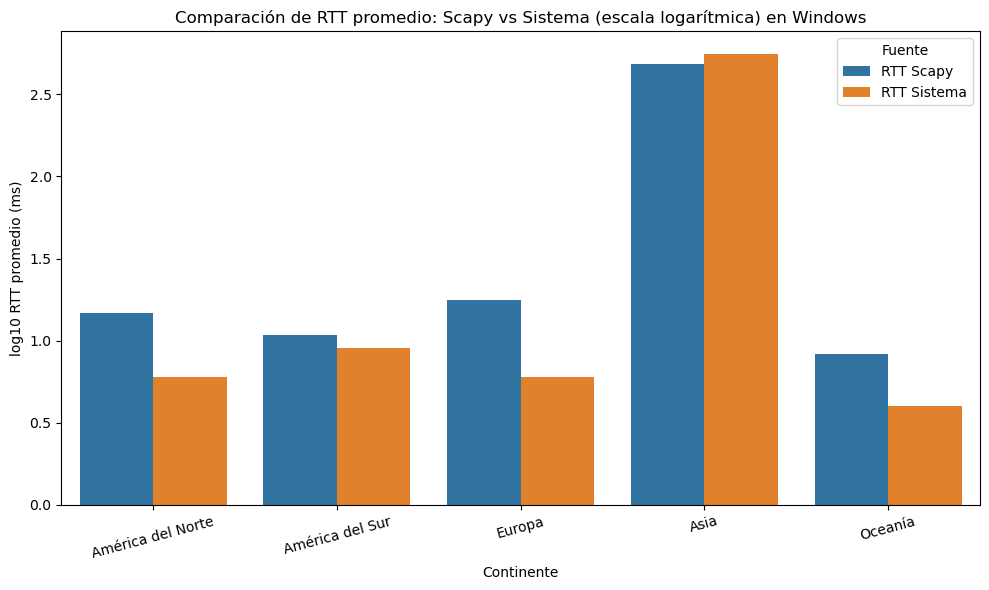

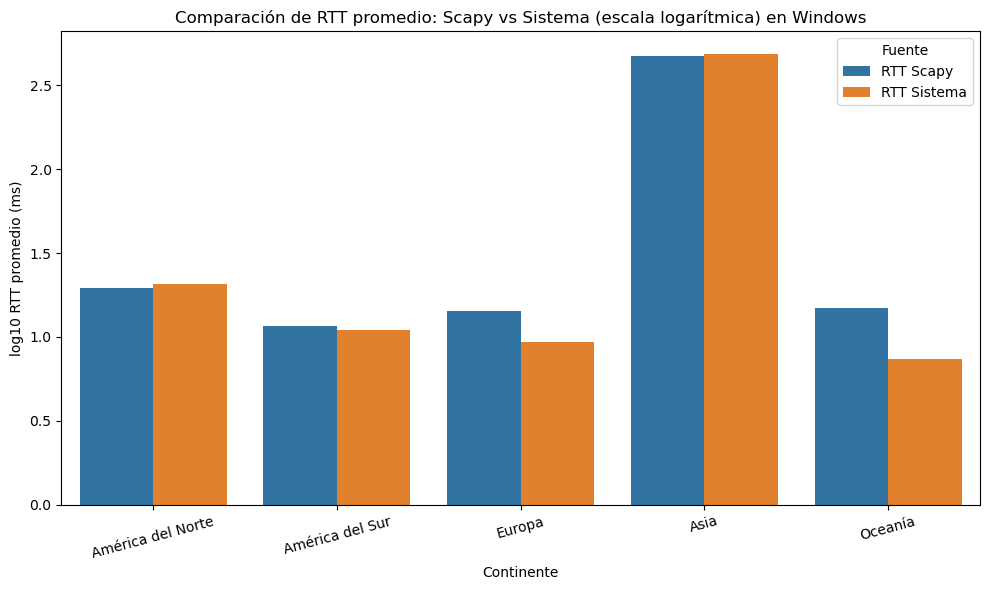

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Resultados obtenidos en WINDOWS
comparacionW = [
    {"Continente": "América del Norte", "Universidad": "web.mit.edu", "RTT Scapy":14.72, "RTT Sistema": 6},
    {"Continente": "América del Sur", "Universidad": "utdt.edu", "RTT Scapy": 10.75, "RTT Sistema": 9},
    {"Continente": "Europa", "Universidad": "ox.ac.uk", "RTT Scapy": 17.60, "RTT Sistema": 6},
    {"Continente": "Asia", "Universidad": "en.sjtu.edu.cn", "RTT Scapy": 485.42, "RTT Sistema": 559},
    {"Continente": "Oceanía", "Universidad": "unimelb.edu.au", "RTT Scapy": 8.31, "RTT Sistema": 4},
]

df = pd.DataFrame(comparacionW)

# Aplicamos logaritmo base 10 a los valores de RTT
df["RTT Scapy"] = np.log10(df["RTT Scapy"])
df["RTT Sistema"] = np.log10(df["RTT Sistema"])

# Gráfico comparativo (escala logarítmica)
df_melted = df.melt(id_vars=["Continente", "Universidad"], value_vars=["RTT Scapy", "RTT Sistema"],
                    var_name="Fuente", value_name="log10 RTT promedio (ms)")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Continente", y="log10 RTT promedio (ms)", hue="Fuente")
plt.title("Comparación de RTT promedio: Scapy vs Sistema (escala logarítmica) en Windows")
plt.ylabel("log10 RTT promedio (ms)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()




# Resultados obtenidos en MACBOOK
comparacionM = [
    {"Continente": "América del Norte", "Universidad": "web.mit.edu", "RTT Scapy":19.61, "RTT Sistema": 20.60 },
    {"Continente": "América del Sur", "Universidad": "utdt.edu", "RTT Scapy": 11.6, "RTT Sistema": 11.06},
    {"Continente": "Europa", "Universidad": "ox.ac.uk", "RTT Scapy": 14.35, "RTT Sistema": 9.29},
    {"Continente": "Asia", "Universidad": "en.sjtu.edu.cn", "RTT Scapy":472.38 , "RTT Sistema": 487.84},
    {"Continente": "Oceanía", "Universidad": "unimelb.edu.au", "RTT Scapy": 14.84, "RTT Sistema": 7.35},
]

df = pd.DataFrame(comparacionM)

# Aplicamos logaritmo base 10 a los valores de RTT
df["RTT Scapy"] = np.log10(df["RTT Scapy"])
df["RTT Sistema"] = np.log10(df["RTT Sistema"])

# Gráfico comparativo (escala logarítmica)
df_melted = df.melt(id_vars=["Continente", "Universidad"], value_vars=["RTT Scapy", "RTT Sistema"],
                    var_name="Fuente", value_name="log10 RTT promedio (ms)")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Continente", y="log10 RTT promedio (ms)", hue="Fuente")
plt.title("Comparación de RTT promedio: Scapy vs Sistema (escala logarítmica) en Windows")
plt.ylabel("log10 RTT promedio (ms)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
